# PyTorch Workflow!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating the model inference",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model inference',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning!! :)

Machine learning is a game of two parts:
1. get data into a numberical representation.
2. build a model to learn patterns in that numerical representation

to showcase this, lets create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with *known* **parameters**. (parameters is something a model learns)

In [3]:
# Create *Known* parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * (X) + bias

X[:10], y[:10], len(X), len(y)

#model will look at the X value, and the model will predict the y

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]),
 100,
 100)

### Spliting data into training and test sets (one of the most important

---

concepts in machine learning in general)

LETS CREATE A TRAINING AND TESTING SET!!!!!!!!!

In [4]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

How can we better visualize our data?

This is where the data explorer's motto comes in

"Visualize, visualize, visualize!"

In [5]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """Plots training data, test data and compares predictions."""
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

#plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

#show legends
  plt.legend(prop={"size":14 });

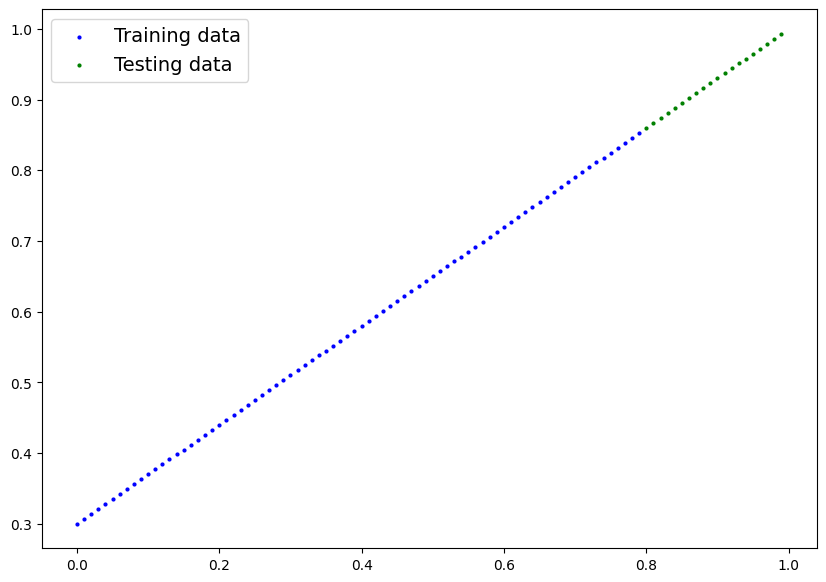

In [6]:
plot_predictions();

## 2. Build model

our first PyTorch model!!!!!!!!

Python classes tutorial: https://realpython.com/python-classes/

What our model does:
1. start with random values (weights and bias)
2. Looks at training data and adjust random values to better refelect (or get closer to) the ideal value (the weight and bias are what we used to create the data)

How does it do so?
by two main algorithsm:
1. gradient decent
2. backpropagation

In [7]:
from torch import nn
# Create Linear regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherhits from nn.Module, the lego building bricks of PyTorch Models
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, #starting with random parameter
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define teh computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data type of torch.Tensor
    return self.weight * x + self.bias


#what our model does
* start with random values (weight and bais)
* look at training data, and adjust random value to getter close to the ideal values (the weight and bais value we used to create the data)

How?
Through two main algorithms:
1. Gradient desecnt
2. Backpropagation

### PyTorch model building essentials

* torch.nn - contains all the building for computeritonal grpahs
* paramter: what param should our model try and learn , often pytorch layer fromnn will set these for us
*modules - the base call for all neaural network models. to override it use forward()
* torch.optim - optimizer in pythorch, help with gradient decent
* def forward() - all nn.Module subsclasses requires you to overwrite forward(), this method defines what foward computation

In [8]:
# create a random seed
#torch.manual_seed(42) #get the same random value each time

#create a instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.9440], requires_grad=True),
 Parameter containing:
 tensor([0.6790], requires_grad=True)]

In [9]:
model_0.state_dict() #like a list, but it looks better

OrderedDict([('weight', tensor([-0.9440])), ('bias', tensor([0.6790]))])

### making prdiction  using 'torch.inference_mode()'

to check our model predictive power, check how well it predicts 'y_test' based on 'x_test'

when we pass data through our model, it is going to run it throught the forward() method

In [10]:
#make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

print(y_preds)

print(y_test)

tensor([[-0.0762],
        [-0.0856],
        [-0.0951],
        [-0.1045],
        [-0.1140],
        [-0.1234],
        [-0.1328],
        [-0.1423],
        [-0.1517],
        [-0.1612],
        [-0.1706],
        [-0.1800],
        [-0.1895],
        [-0.1989],
        [-0.2084],
        [-0.2178],
        [-0.2272],
        [-0.2367],
        [-0.2461],
        [-0.2556]])
tensor([[0.8600],
        [0.8670],
        [0.8740],
        [0.8810],
        [0.8880],
        [0.8950],
        [0.9020],
        [0.9090],
        [0.9160],
        [0.9230],
        [0.9300],
        [0.9370],
        [0.9440],
        [0.9510],
        [0.9580],
        [0.9650],
        [0.9720],
        [0.9790],
        [0.9860],
        [0.9930]])


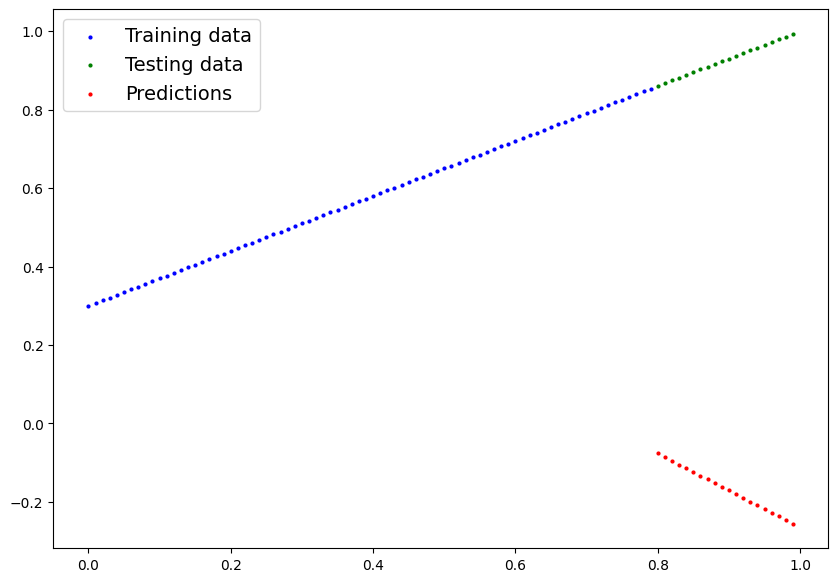

In [11]:
plot_predictions(predictions=y_preds)

### training the model

the whole idea is traing the model to move from some unknown parameter to some known paramter
or get it to better representation

One way to measure how poor or how wrong your models predictions are is to use a lost function



In [12]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.9440])), ('bias', tensor([0.6790]))])

In [13]:
#set up the lost function, checks how wrong the model is
loss_fn = nn.L1Loss()

#setup an optionzer Stochastic gradient descent
optimizer = torch.optim.SGD(params=model_0.parameters(), #parameter is a value the model sets itself
                            lr = 0.01) #lr = learning rate = possible the most important hyperprama you can set

###bulding a training loop (and a testing loop) in pytorch

a couple of tings we will need in a training loop:
0. loop through the data
1. forward pass (this invloves data moving through our model 'forward' override function) - to make data prdictions - also called forward propagation
2. calculate the loss
3. Optimizer zero grad
4. loss backward - move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss
5. optimizer step - use the optimizer to adjust our model's parameter to try and imporve the loss (**gradient desecnt yall**)


Epoch: 0 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 10 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 20 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 30 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 40 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 50 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor([0.2953]))])
Epoch: 60 | Loss: 0.003815149888396263 | Test loss: 0.011559048667550087
OrderedDict([('weight', tensor([0.6924])), ('bias', tensor

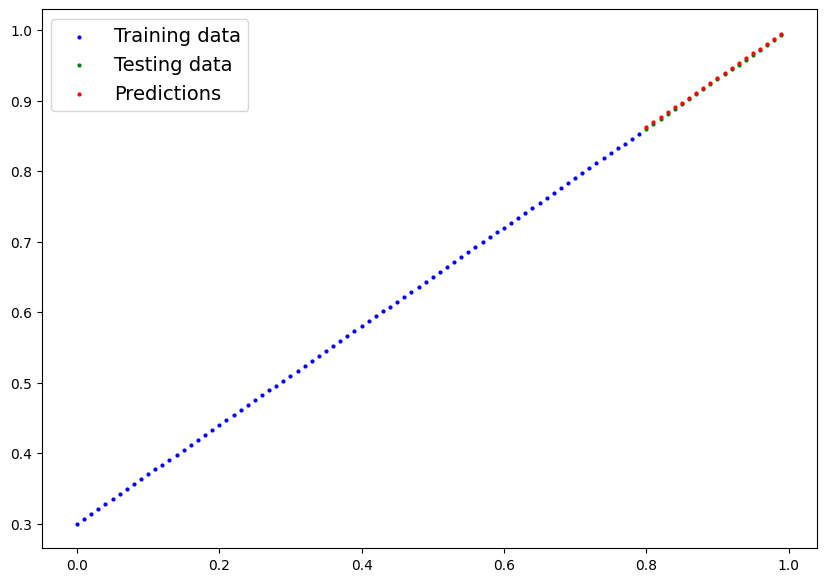

In [19]:
#an epoch is one loop throgh the data (hyperparameter because we set it our selfs)
epochs = 100

#track different values
epoch_count = []
loss_values = []
test_loss_values = []


# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch set all param that require gradients to require gradiants

  #1. forward pass function
  y_pred = model_0(X_train)

  #2. calcualte the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradent descent)
  optimizer.step()

  #testing
  model_0.eval() #turn off gradient tracking
  with torch.inference_mode(): #tursn off gradient tracking
    # do forward pass
    test_pred = model_0(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      #print out model state_dict()
      print(model_0.state_dict())


print(f"loss: {loss}")
plot_predictions(predictions=y_preds)

#save the model

In [20]:
#save our model
from pathlib import Path

#create the model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME = "My_First_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

#Loading pytorch model

In [21]:
model_0.state_dict()

#to load in a state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

print(loaded_model_preds)

print(y_preds)

tensor([[0.8623],
        [0.8693],
        [0.8763],
        [0.8832],
        [0.8902],
        [0.8971],
        [0.9041],
        [0.9111],
        [0.9180],
        [0.9250],
        [0.9320],
        [0.9389],
        [0.9459],
        [0.9528],
        [0.9598],
        [0.9668],
        [0.9737],
        [0.9807],
        [0.9877],
        [0.9946]])
tensor([[0.8623],
        [0.8693],
        [0.8763],
        [0.8832],
        [0.8902],
        [0.8971],
        [0.9041],
        [0.9111],
        [0.9180],
        [0.9250],
        [0.9320],
        [0.9389],
        [0.9459],
        [0.9528],
        [0.9598],
        [0.9668],
        [0.9737],
        [0.9807],
        [0.9877],
        [0.9946]])
